In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [4]:
sdtypes ={'Store_Number':str,'Zip_Code':str}

In [5]:
stores_clust_info_combined3 = pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\stores_clust_info_combined3.csv',index_col=0, dtype=sdtypes,)

In [6]:
stores_clust_info_combined3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1948 entries, 0 to 1947
Data columns (total 57 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Store_Number                      1948 non-null   object 
 1   Store_Name                        1948 non-null   object 
 2   Address                           1948 non-null   object 
 3   City                              1948 non-null   object 
 4   Zip_Code                          1948 non-null   object 
 5   Store_Location                    1790 non-null   object 
 6   County_Number                     1948 non-null   int64  
 7   County                            1948 non-null   object 
 8   Store_Name.1                      1948 non-null   object 
 9   store_revenue                     1948 non-null   float64
 10  tot_num_unique_items              1948 non-null   int64  
 11  num_unique_clusters               1948 non-null   int64  
 12  tot_it

### drop 18 outlier stores

In [7]:
stores_clust_info_combined4 = stores_clust_info_combined3.loc[stores_clust_info_combined3.n_clusters_4 != 2]
stores_clust_info_combined4.shape

(1930, 57)

In [8]:
stores_clust_info_combined3.shape

(1948, 57)

In [9]:
# stores_clust_info_combined4.columns

### drop scaled features

In [10]:
# stores_clust_info_combined4 = 
# stores_clust_info_combined4 = 
stores_clust_info_combined4 = stores_clust_info_combined4.drop(columns = ['tot_num_unique_items_scaled',
       'rev_Cheap_scaled', 'rev_Moderately_High_scaled',
       'rev_Most_Variety_scaled', 'rev_Popular_Bottles_scaled',
       'rev_Volume_For_Dollar_scaled', 'cl_Cheap_scaled', 'cl_High_End_scaled',
       'cl_Moderately_High_scaled', 'cl_Most_Variety_scaled',
       'cl_Popular_Bottles_scaled', 'cl_Quick_Shots_scaled',
       'cl_Volume_For_Dollar_scaled', 'num_unique_clusters_scaled',
       'n_clusters_2', 'n_clusters_4'])

In [11]:
stores_clust_info_combined4.shape

(1930, 41)

### make a copy of stores_clust_info_combined4

In [12]:
stores_clust_info_combined4_copy = stores_clust_info_combined4.copy()

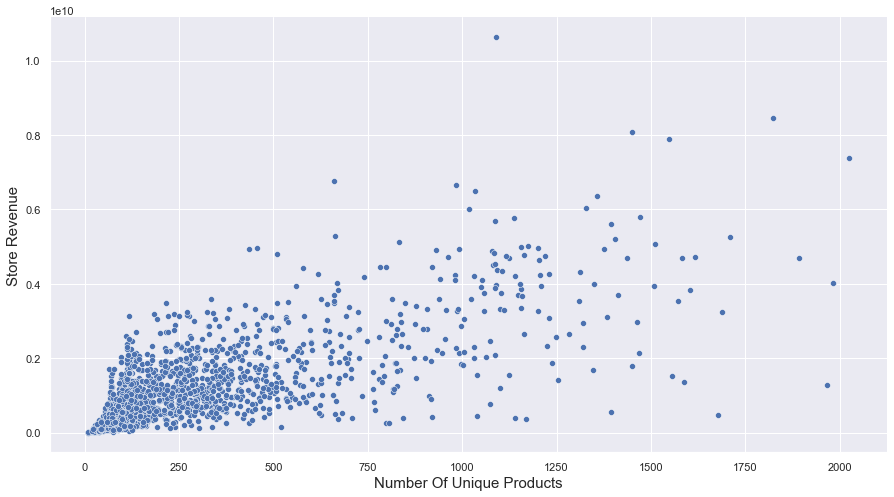

In [13]:

sns.set(rc = {'figure.figsize':(15,8)})
scatter = sns.scatterplot(x = 'tot_num_unique_items',y = 'store_revenue',data = stores_clust_info_combined4) #hue='label'
scatter.set_xlabel('Number Of Unique Products',fontsize=15)
scatter.set_ylabel('Store Revenue',fontsize=15)
sns.despine()

In [14]:
stores_clust_info_combined4[stores_clust_info_combined4.tot_num_unique_items > 1750]

,Store_Number,Store_Name,Address,City,Zip_Code,Store_Location,County_Number,County,Store_Name.1,store_revenue,...,item_Popular_Bottles,item_Quick_Shots,item_Volume_For_Dollar,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Quick_Shots,cl_Volume_For_Dollar
1166,6132,Dubuque Wine & Spirits,3305 Asbury Rd,Dubuque,52002,POINT (-90.72104 42.51242500000001),31,DUBUQUE,Dubuque Wine & Spirits,1.285899e+09,...,2.085453,11.902340,14.394710,94.117647,15.923567,25.313569,46.975898,97.619048,53.669725,62.334802
1320,2614,Hy-Vee #3 Food & Drugstore / Davenport,1823 E Kimberly Rd,Davenport,52807,POINT (-90.548919 41.55678100000001),82,SCOTT,Hy-Vee #3 Food & Drugstore / Davenport,4.694030e+09,...,2.060222,9.825674,14.527205,82.352941,24.203822,25.997719,46.157344,92.857143,42.660550,60.572687
1401,4129,Cyclone Liquors,626 Lincoln Way,Ames,50010,POINT (-93.618289 42.022865),85,STORY,Cyclone Liquors,4.028390e+09,...,1.966717,7.261725,9.884014,88.970588,31.210191,40.592930,49.022283,92.857143,33.027523,43.171806
1405,3773,Benz Distributing,501 7th Ave SE,Cedar Rapids,52401,POINT (-91.659875 41.97574),57,LINN,Benz Distributing,8.451654e+09,...,1.645639,8.228195,5.595173,63.235294,38.216561,43.443558,46.111869,71.428571,34.403670,22.466960
1856,2190,"Central City Liquor, Inc.",1460 2ND AVE,Des Moines,50314,POINT (-93.619788 41.605706),77,POLK,"Central City Liquor, Inc.",7.370231e+09,...,1.925926,7.358025,8.691358,85.294118,50.955414,51.197263,46.202819,92.857143,34.174312,38.766520


create outlier data frame

In [15]:
outliers_df = stores_clust_info_combined4[stores_clust_info_combined4.tot_num_unique_items > 1750]

### remove 5 out liers

In [16]:
filt = stores_clust_info_combined4.tot_num_unique_items > 1750

In [17]:
stores_clust_info_combined4 = stores_clust_info_combined4[~filt]

In [18]:
#      'tot_num_unique_items',
#      'num_unique_clusters',
#      'tot_item_count',
#      'rev_Cheap',
     
#      'rev_Moderately_High',
#      'rev_Most_Variety',
#      'rev_Popular_Bottles',
#      'rev_Quick_Shots',
#      'rev_Volume_For_Dollar',
#      'item_Cheap',
     
#      'item_Moderately_High',
#      'item_Most_Variety',
#      'item_Popular_Bottles',
#      'item_Quick_Shots',
#      'item_Volume_For_Dollar',
#      'cl_Cheap',
#      'cl_High_End',
#      'cl_Moderately_High',
#      'cl_Most_Variety',
#      'cl_Popular_Bottles',
#      'cl_Quick_Shots',
#      'cl_Volume_For_Dollar'

In [19]:
features = ['store_revenue','tot_num_unique_items',
 'rev_Cheap',
 'rev_Moderately_High',
 'rev_Most_Variety',
 'rev_Popular_Bottles',
 'rev_Volume_For_Dollar', 
 'cl_Cheap',
 'cl_High_End',
 'cl_Moderately_High',
 'cl_Most_Variety',
 'cl_Popular_Bottles',
 'cl_Quick_Shots',
 'cl_Volume_For_Dollar',
  'num_unique_clusters'         ]

In [20]:
scaled_features = ['store_revenue_scaled','tot_num_unique_items_scaled',
 'rev_Cheap_scaled',
 'rev_Moderately_High_scaled',
 'rev_Most_Variety_scaled',
 'rev_Popular_Bottles_scaled',
 'rev_Volume_For_Dollar_scaled', 
 'cl_Cheap_scaled',
 'cl_High_End_scaled',
 'cl_Moderately_High_scaled',
 'cl_Most_Variety_scaled',
 'cl_Popular_Bottles_scaled',
 'cl_Quick_Shots_scaled',
 'cl_Volume_For_Dollar_scaled', 'num_unique_clusters_scaled']

In [21]:
stores_clust_info_combined4 = stores_clust_info_combined4.reset_index()


In [22]:
stores_clust_info_combined4.head()

,index,Store_Number,Store_Name,Address,City,Zip_Code,Store_Location,County_Number,County,Store_Name.1,...,item_Popular_Bottles,item_Quick_Shots,item_Volume_For_Dollar,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Quick_Shots,cl_Volume_For_Dollar
0,0,3855,Dyno's Wine and Spirits / Storm Lake,1201 1/2 Lakeshore Dr,Storm Lake,50588,NaN,11,BUENA VIST,Dyno's Wine and Spirits / Storm Lake,...,16.666667,23.333333,0.000000,5.147059,0.0,0.0,0.500227,11.904762,1.605505,0.000000
1,1,4589,Dyno's #53 / Sibley,1026 2nd Ave,Sibley,51249,POINT (-95.752119 43.397431),72,OSCEOLA,Dyno's #53 / Sibley,...,16.666667,8.333333,16.666667,6.617647,0.0,0.0,0.545703,14.285714,0.688073,1.321586
2,2,5688,Dyno's #40 / Spencer,1001 S Grand Ave,Spencer,51301,POINT (-95.143701 43.12759),21,CLAY,Dyno's #40 / Spencer,...,50.000000,0.000000,21.428571,2.205882,0.0,0.0,0.045475,16.666667,0.000000,0.660793
3,3,4592,Dyno's #29 / Emmetsburg,"2401, Main",Emmetsburg,50536,POINT (-94.681939 43.111913),74,PALO ALTO,Dyno's #29 / Emmetsburg,...,9.090909,27.272727,18.181818,3.676471,0.0,0.0,0.454752,7.142857,2.064220,1.321586
4,4,5689,Dyno's #41 / Albert City,5101 230th St,Albert City,50510,POINT (-94.953239 42.777449),11,BUENA VIST,Dyno's #41 / Albert City,...,23.076923,7.692308,0.000000,3.676471,0.0,0.0,0.181901,7.142857,0.229358,0.000000


In [23]:
stores_clust_info_combined4 = stores_clust_info_combined4.drop(columns=['index'])

In [24]:
scaler = StandardScaler()

In [25]:
type(stores_clust_info_combined4)

pandas.core.frame.DataFrame

scale features

In [26]:
stores_clust_info_combined4[scaled_features] = scaler.fit_transform\
                                           (stores_clust_info_combined4[features])


In [27]:
stores_clust_info_combined4[scaled_features].describe()

,store_revenue_scaled,tot_num_unique_items_scaled,rev_Cheap_scaled,rev_Moderately_High_scaled,rev_Most_Variety_scaled,rev_Popular_Bottles_scaled,rev_Volume_For_Dollar_scaled,cl_Cheap_scaled,cl_High_End_scaled,cl_Moderately_High_scaled,cl_Most_Variety_scaled,cl_Popular_Bottles_scaled,cl_Quick_Shots_scaled,cl_Volume_For_Dollar_scaled,num_unique_clusters_scaled
count,1.925000e+03,1.925000e+03,1.925000e+03,1.925000e+03,1.925000e+03,1.925000e+03,1.925000e+03,1.925000e+03,1.925000e+03,1.925000e+03,1.925000e+03,1.925000e+03,1.925000e+03,1.925000e+03,1.925000e+03
mean,-3.041723e-16,4.559124e-16,-3.837334e-16,1.085827e-15,9.458523e-18,9.654326e-16,-8.679925e-17,-3.535700e-16,4.664523e-15,-2.375272e-15,9.902613e-17,2.361170e-16,2.168540e-16,1.313812e-15,-3.031947e-15
std,1.000260e+00,1.000260e+00,1.000260e+00,1.000260e+00,1.000260e+00,1.000260e+00,1.000260e+00,1.000260e+00,1.000260e+00,1.000260e+00,1.000260e+00,1.000260e+00,1.000260e+00,1.000260e+00,1.000260e+00
min,-1.020902e+00,-8.831768e-01,-2.708895e+00,-5.567705e-01,-1.042762e+00,-5.183858e+00,-1.154418e+00,-1.970671e+00,-4.381004e-01,-4.962549e-01,-6.762061e-01,-3.378037e+00,-8.518686e-01,-7.939812e-01,-5.145251e+00
25%,-6.592579e-01,-6.029907e-01,-6.883176e-01,-5.567705e-01,-7.215954e-01,-7.089685e-01,-8.022215e-01,-6.348712e-01,-4.381004e-01,-4.962549e-01,-5.769715e-01,-6.131570e-01,-6.691035e-01,-6.603319e-01,-9.568132e-01
50%,-3.198050e-01,-4.510825e-01,-1.112155e-01,-5.022023e-01,-3.918256e-01,1.117443e-01,-3.605455e-01,-2.039682e-01,-4.381004e-01,-4.476198e-01,-4.715348e-01,7.806298e-02,-4.080104e-01,-5.044077e-01,9.029618e-02
75%,3.027486e-01,2.071860e-01,5.278121e-01,1.610449e-01,3.975995e-01,8.228840e-01,6.788762e-01,4.854766e-01,-1.194368e-01,-5.853897e-02,1.300746e-01,6.310390e-01,2.447222e-01,3.865879e-01,1.137406e+00
max,8.727601e+00,4.855575e+00,8.849417e+00,1.071925e+01,6.130693e+00,2.029725e+00,4.158417e+00,3.286346e+00,1.039646e+01,8.695779e+00,5.116610e+00,2.428211e+00,5.571020e+00,5.019765e+00,1.137406e+00


In [28]:
stores_clust_info_combined4.store_revenue.corr(stores_clust_info_combined4.tot_num_unique_items)

0.7279811881545474

In [29]:
stores_clust_info_combined4.shape

(1925, 56)

In [30]:
# stores_clust_info_combined4.info()

In [31]:
from sklearn.metrics import silhouette_score

cluster_cols = [       
 'rev_Cheap_scaled',
 'rev_Moderately_High_scaled',
 'rev_Most_Variety_scaled',
 'rev_Popular_Bottles_scaled',
 'rev_Volume_For_Dollar_scaled']
#  'cl_Cheap_scaled',
#  'cl_High_End_scaled',
#  'cl_Moderately_High_scaled',
#  'cl_Most_Variety_scaled',
#  'cl_Popular_Bottles_scaled',
 
#  'cl_Volume_For_Dollar_scaled']

df_scaled = stores_clust_info_combined4[cluster_cols]


for clust in range(2,11):
    model = KMeans(n_clusters=clust, random_state=42).fit(df_scaled)
    

    
    silhouette_avg = silhouette_score(df_scaled,model.labels_)
    print('number of clusters = ',clust,' ','silhouette score = ',silhouette_avg)

number of clusters =  2   silhouette score =  0.43408093333582126
number of clusters =  3   silhouette score =  0.4399750147928817
number of clusters =  4   silhouette score =  0.40574732255236723
number of clusters =  5   silhouette score =  0.3860722643771712
number of clusters =  6   silhouette score =  0.3086470960680385
number of clusters =  7   silhouette score =  0.29750878756981514
number of clusters =  8   silhouette score =  0.3013589813057504
number of clusters =  9   silhouette score =  0.29845056662528285
number of clusters =  10   silhouette score =  0.304298473357964


In [32]:
from sklearn.metrics import silhouette_score

cluster_cols = ['tot_num_unique_items_scaled',       
 'rev_Cheap_scaled',
 'rev_Moderately_High_scaled',
 'rev_Most_Variety_scaled',
 'rev_Popular_Bottles_scaled',
 'rev_Volume_For_Dollar_scaled']
#  'cl_Cheap_scaled',
#  'cl_High_End_scaled',
#  'cl_Moderately_High_scaled',
#  'cl_Most_Variety_scaled',
#  'cl_Popular_Bottles_scaled',
 
#  'cl_Volume_For_Dollar_scaled']

df_scaled = stores_clust_info_combined4[cluster_cols]


for clust in range(2,6):
    model = KMeans(n_clusters=clust, random_state=42).fit(df_scaled)
    

    
    silhouette_avg = silhouette_score(df_scaled,model.labels_)
    print('number of clusters = ',clust,' ','silhouette score = ',silhouette_avg)

number of clusters =  2   silhouette score =  0.4475062643557119
number of clusters =  3   silhouette score =  0.3835062078437221
number of clusters =  4   silhouette score =  0.4223344841413703
number of clusters =  5   silhouette score =  0.34369039286063285


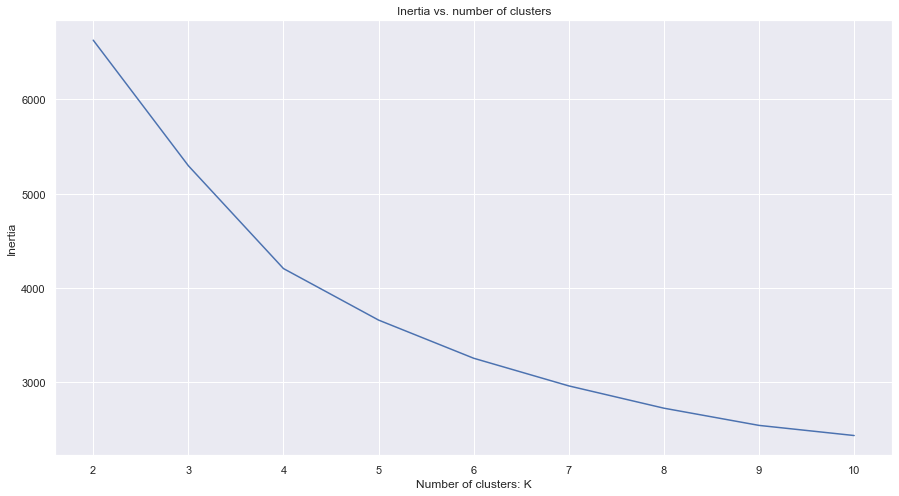

In [33]:
cluster_cols = ['tot_num_unique_items_scaled',
 'rev_Cheap_scaled',
 'rev_Moderately_High_scaled',
 'rev_Most_Variety_scaled',
 'rev_Popular_Bottles_scaled',
 'rev_Volume_For_Dollar_scaled']

df_scaled = stores_clust_info_combined4[cluster_cols]

inertia_scores = []

for clust in range(2,11):
    inertia = KMeans(n_clusters=clust, random_state=42)\
              .fit(df_scaled).inertia_
    inertia_scores.append(inertia)

plt.plot(range(2,11), inertia_scores)
plt.title("Inertia vs. number of clusters")
plt.xlabel("Number of clusters: K")
plt.ylabel('Inertia')
plt.show()


#### Functions to create a polar graph


In [34]:

# # THEN:

# import pandas as pd
# import plotly.graph_objects as go
# import plotly.express as px 
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import MinMaxScaler, StandardScaler

# def scale(df, cols, **kwargs):
#     df = df.loc[:, cols]
#     df = df.to_numpy()
#     if 'scaletype' in kwargs and kwargs['scaletype'] == 'minmax':
#         scaler = MinMaxScaler()
#     else:
#         scaler = StandardScaler()
#     scaler.fit(df)
#     X = scaler.transform(df)
#     dff = pd.DataFrame(X, columns = cols)
#     return dff, scaler

# def get_kmeans(data, cols, n_clusters = 3, random_state = 42, **kwargs):
#     data, scaler = scale(df = data, cols = cols, **kwargs)
#     kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init = 10, tol = 1e-04, random_state = random_state)
#     kmeans.fit(data)
#     clusters = pd.DataFrame(data, columns = cols)
#     clusters['label'] = kmeans.labels_
#     polars = clusters.groupby('label').mean().reset_index()
#     polars = pd.melt(polars, id_vars = ['label'])
#     fig = px.line_polar(polars, r='value', theta = 'variable', color = 'label', line_close = True, height = 800, width = 1400)
#     return fig, polars, clusters, scaler

# def get_clusters(data, cols, cluster_labels):
#     data = data[cols]
#     clusters = pd.DataFrame(data, columns = cols)
#     clusters['label'] = cluster_labels
#     polar = clusters.groupby('label').mean().reset_index()
#     polar = pd.melt(polar, id_vars = ['label'])
#     fig = px.line_polar(polar, r = 'value', theta = 'variable', color = 'label', line_close = True, height = 800, width = 1400)
#     return fig, polar, clusters, scaler





    
    
 


In [35]:
cols1 = ['tot_num_unique_items',
 'rev_Cheap',
 'rev_Moderately_High',
 'rev_Most_Variety',
 'rev_Popular_Bottles',
 'rev_Volume_For_Dollar']

In [36]:
stores_clust_info_combined4[cols1].describe().round(2)

,tot_num_unique_items,rev_Cheap,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar
count,1925.00,1925.00,1925.00,1925.00,1925.00,1925.00
mean,270.62,17.37,0.66,3.27,68.59,8.79
std,296.31,6.41,1.19,3.13,13.24,7.61
min,9.00,0.00,0.00,0.00,0.00,0.00
25%,92.00,12.96,0.00,1.01,59.21,2.68
50%,137.00,16.66,0.07,2.04,70.07,6.04
75%,332.00,20.76,0.86,4.51,79.48,13.95
max,1709.00,74.13,13.46,22.47,95.45,40.44


using functions to create radial graph

In [37]:

# df_scaled = scale(stores_clust_info_combined4, cols1)
# fig, polars, clusters, scaler = get_kmeans(stores_clust_info_combined4, cols = cols1,n_clusters=3)
# fig, polars, clusters, scaler = get_clusters(clusters, cols1, clusters['label'])
# # plt.figure(figsize = (12,10))
# fig.update_layout(
#     autosize=False,
#     width=400,
#     height=400,)
# fig.show()



In [38]:
# 1. Red = Supermarkets with lots of alcohol variety
# 1. Blue = Smaller bodegas with lower variety that focus much more than other store types on selling popular bottles 
# 1. Green = Medium-sized mom and pop stores that carry some but not a ton of variety and exist in the middle between two other groups 

### three clusters

In [39]:
cols1 = ['tot_num_unique_items',
 'rev_Cheap',
 'rev_Moderately_High',
 'rev_Most_Variety',
 'rev_Popular_Bottles',
 'rev_Volume_For_Dollar']


# df_scaled = scale(stores_clust_info_combined4, cols1)
# fig, polars, clusters, scaler = get_kmeans(stores_clust_info_combined4, cols = cols1,n_clusters=3)
# fig, polars, clusters, scaler = get_clusters(clusters, cols1, clusters['label'])
# # plt.figure(figsize = (12,10))
# fig.update_layout(
#     autosize=False,
#     width=800,
#     height=800,)
# fig.show()



### three clusters

In [40]:



# cluster_cols = ['tot_num_unique_items_scaled',
#  'rev_Cheap_scaled',
#  'rev_Moderately_High_scaled',
#  'rev_Most_Variety_scaled',
#  'rev_Popular_Bottles_scaled',
#  'rev_Volume_For_Dollar_scaled']

# model = KMeans(n_clusters=3, random_state=42)

# model.fit(stores_clust_info_combined4[cluster_cols])

# stores_clust_info_combined4['label_1'] = model.predict(stores_clust_info_combined4[cluster_cols])

In [41]:
pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)



In [42]:
# stores_clust_info_combined4.groupby(['label_1']).agg({'Store_Number':'count','store_revenue_scaled':['mean','median','std'],
#                                                     'tot_num_unique_items_scaled':['mean','median','std'],
#  'rev_Cheap_scaled':['mean','median','std'],
#  'rev_Moderately_High_scaled':['mean','median','std'],
#  'rev_Most_Variety_scaled':['mean','median','std'],
#  'rev_Popular_Bottles_scaled':['mean','median','std'],
#  'rev_Volume_For_Dollar_scaled':['mean','median','std'],})

In [43]:
pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)

# where do I put my store to make the most money
# don't worry about inventory

In [44]:
# 3 Clusters
# stores_clust_info_combined4.groupby(['label_1']).agg({'Store_Number':'count','store_revenue':['mean','median','std'],
#                                                     'tot_num_unique_items':['mean','median','std'],
#  'rev_Cheap':['mean','median','std'],
#  'rev_Moderately_High':['mean','median','std'],
#  'rev_Most_Variety':['mean','median','std'],
#  'rev_Popular_Bottles':['mean','median','std'],
#  'rev_Volume_For_Dollar':['mean','median','std'],})

In [45]:
# 3 Clusters
# stores_clust_info_combined4.groupby(['label_1']).agg({'Store_Number':'count','store_revenue':['median'],
#                                                     'tot_num_unique_items':['median'],
#  'rev_Cheap':['median'],
#  'rev_Moderately_High':['median'],
#  'rev_Most_Variety':['median'],
#  'rev_Popular_Bottles':['median'],
#  'rev_Volume_For_Dollar':['median']})

In [46]:
# cols = ['Store_Name',  'City', 'Zip_Code',
#         'County', 
#        'store_revenue', 'tot_num_unique_items', 'num_unique_clusters',
#        'tot_item_count', 'rev_Cheap', 'rev_High_End', 'rev_Moderately_High',
#        'rev_Most_Variety', 'rev_Popular_Bottles', 
#        'rev_Volume_For_Dollar', 'cl_Cheap', 'cl_High_End',
#        'cl_Moderately_High', 'cl_Most_Variety', 'cl_Popular_Bottles',
#        'cl_Quick_Shots', 'cl_Volume_For_Dollar']

# stores_clust_info_combined4.loc[stores_clust_info_combined4.label_1 == 0,cols].sample(n=100)

In [47]:
# stores_clust_info_combined4.loc[stores_clust_info_combined4.label_1 == 1,cols].sample(n=100)

In [48]:
# stores_clust_info_combined4.loc[stores_clust_info_combined4.label_1 == 2,cols].sample(n=100) #convenience stores

In [49]:
#      ['tot_num_unique_items',
#      'num_unique_clusters',
#      'tot_item_count',
product_clusters =     ['rev_Cheap', 
      'rev_High_End',
     
     'rev_Moderately_High',
     'rev_Most_Variety',
     'rev_Popular_Bottles',
     'rev_Quick_Shots',
     'rev_Volume_For_Dollar']#'rev_Quick_Shots',

In [50]:
stores_clust_info_combined4[product_clusters].describe().round(2)

,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Quick_Shots,rev_Volume_For_Dollar
count,1925.00,1925.00,1925.00,1925.00,1925.00,1925.00,1925.00
mean,17.37,0.04,0.66,3.27,68.59,1.28,8.79
std,6.41,0.12,1.19,3.13,13.24,2.79,7.61
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,12.96,0.00,0.00,1.01,59.21,0.21,2.68
50%,16.66,0.00,0.07,2.04,70.07,0.62,6.04
75%,20.76,0.01,0.86,4.51,79.48,1.66,13.95
max,74.13,2.77,13.46,22.47,95.45,100.00,40.44


In [51]:
stores_clust_info_combined4.columns

Index(['Store_Number', 'Store_Name', 'Address', 'City', 'Zip_Code',
       'Store_Location', 'County_Number', 'County', 'Store_Name.1',
       'store_revenue', 'tot_num_unique_items', 'num_unique_clusters',
       'tot_item_count', 'rev_Cheap', 'rev_High_End', 'rev_Moderately_High',
       'rev_Most_Variety', 'rev_Popular_Bottles', 'rev_Quick_Shots',
       'rev_Volume_For_Dollar', 'prod_count_pct_Cheap',
       'prod_count_pct_High_End', 'prod_count_pct_Moderately_High',
       'prod_count_pct_Most_Variety', 'prod_count_pct_Popular_Bottles',
       'prod_count_pct_Quick_Shots', 'prod_count_pct_Volume_For_Dollar',
       'item_Cheap', 'item_High_End', 'item_Moderately_High',
       'item_Most_Variety', 'item_Popular_Bottles', 'item_Quick_Shots',
       'item_Volume_For_Dollar', 'cl_Cheap', 'cl_High_End',
       'cl_Moderately_High', 'cl_Most_Variety', 'cl_Popular_Bottles',
       'cl_Quick_Shots', 'cl_Volume_For_Dollar', 'store_revenue_scaled',
       'tot_num_unique_items_scaled', 're

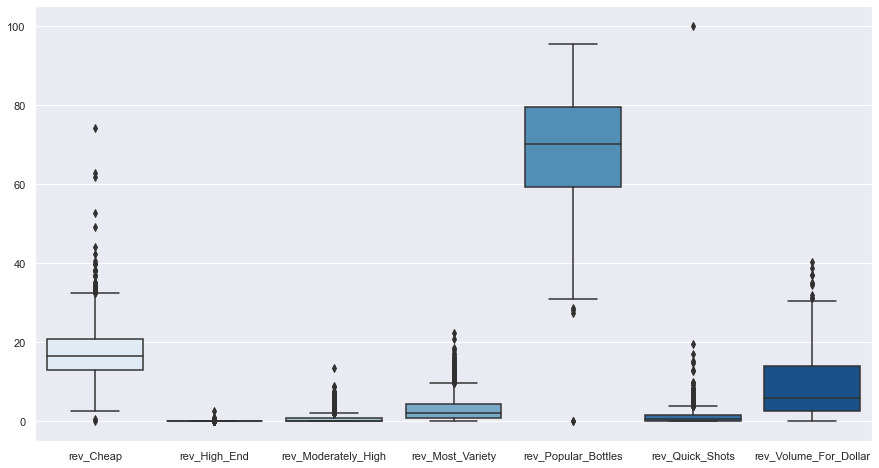

In [52]:
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.boxplot(data=stores_clust_info_combined4[product_clusters], palette='Blues')

In [53]:
# from sklearn.metrics import silhouette_score

# cluster_cols = ['tot_num_unique_items_scaled',       
#  'rev_Cheap_scaled',
#  'rev_Moderately_High_scaled',
#  'rev_Most_Variety_scaled',
#  'rev_Popular_Bottles_scaled',
#  'rev_Volume_For_Dollar_scaled']
# # 'rev_Moderately_High_scaled',
# #  'cl_Cheap_scaled',
# #  'cl_High_End_scaled',
# #  'cl_Moderately_High_scaled',
# #  'cl_Most_Variety_scaled',
# #  'cl_Popular_Bottles_scaled',
 
# #  'cl_Volume_For_Dollar_scaled']

# df_scaled = stores_clust_info_combined4[cluster_cols]


# for clust in range(2,6):
#     model = KMeans(n_clusters=clust, random_state=42).fit(df_scaled)
    

    
#     silhouette_avg = silhouette_score(df_scaled,model.labels_)
#     print('number of clusters = ',clust,' ','silhouette score = ',silhouette_avg)

# # cluster_cols = ['tot_num_unique_items_scaled',
# #  'rev_Cheap_scaled',
# #  'rev_Moderately_High_scaled',
# #  'rev_Most_Variety_scaled',
# #  'rev_Popular_Bottles_scaled',
# #  'rev_Volume_For_Dollar_scaled']

# # df_scaled = stores_clust_info_combined2[cluster_cols]

# inertia_scores = []

# for clust in range(2,6):
#     inertia = KMeans(n_clusters=clust, random_state=42)\
#               .fit(df_scaled).inertia_
#     inertia_scores.append(inertia)

# plt.plot(range(2,6), inertia_scores)
# plt.title("Inertia vs. number of clusters")
# plt.xlabel("Number of clusters: K")
# plt.ylabel('Inertia')
# plt.show()


### four clusters

In [54]:
cluster_cols = ['tot_num_unique_items_scaled',
 'rev_Cheap_scaled',
 'rev_Moderately_High_scaled',
 'rev_Most_Variety_scaled',
 'rev_Popular_Bottles_scaled',
 'rev_Volume_For_Dollar_scaled']
# 'rev_Moderately_High_scaled',

model = KMeans(n_clusters=4, random_state=42)

model.fit(stores_clust_info_combined4[cluster_cols])

stores_clust_info_combined4['label_2'] = model.predict(stores_clust_info_combined4[cluster_cols])

In [55]:

stores_clust_info_combined4.groupby(['label_2']).agg({'Store_Number':'count','store_revenue':['median'],
                                                    'tot_num_unique_items':['median'],
 'rev_Cheap':['median'],
 'rev_Moderately_High':['median'],
 'rev_Most_Variety':['median'],
 'rev_Popular_Bottles':['median'],
 'rev_Volume_For_Dollar':['median']})

,Store_Number,store_revenue,tot_num_unique_items,rev_Cheap,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar
,count,median,median,median,median,median,median,median
label_2,,,,,,,,
0,1006,5.431500e+08,98.0,14.432106,0.000000,1.073907,79.116682,3.179992
1,199,2.662500e+09,987.0,21.514845,1.999076,9.511640,47.651635,16.781179
2,483,1.321865e+09,295.0,16.510242,0.379387,4.364774,61.645281,17.094413
3,237,7.605373e+08,258.0,26.821136,1.942176,2.995058,59.554106,4.362407


In [56]:
# 4 Clusters
stores_clust_info_combined4.groupby(['label_2']).agg({'Store_Number':'count','store_revenue':['median'],
                                                    'tot_num_unique_items':['median'],
 'rev_Cheap':['median'],
 'rev_Moderately_High':['median'],
 'rev_Most_Variety':['median'],
 'rev_Popular_Bottles':['median'],
 'rev_Volume_For_Dollar':['median']})

,Store_Number,store_revenue,tot_num_unique_items,rev_Cheap,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar
,count,median,median,median,median,median,median,median
label_2,,,,,,,,
0,1006,5.431500e+08,98.0,14.432106,0.000000,1.073907,79.116682,3.179992
1,199,2.662500e+09,987.0,21.514845,1.999076,9.511640,47.651635,16.781179
2,483,1.321865e+09,295.0,16.510242,0.379387,4.364774,61.645281,17.094413
3,237,7.605373e+08,258.0,26.821136,1.942176,2.995058,59.554106,4.362407


### label_2 = 0 

### convenience stores

In [57]:
# 4 clusters
cols = ['Store_Name',  'City', 'Zip_Code',
        'County', 
       'store_revenue', 'tot_num_unique_items', 'num_unique_clusters',
       'tot_item_count', 'rev_Cheap', 'rev_High_End', 'rev_Moderately_High',
       'rev_Most_Variety', 'rev_Popular_Bottles', 
       'rev_Volume_For_Dollar', 'cl_Cheap', 'cl_High_End',
       'cl_Moderately_High', 'cl_Most_Variety', 'cl_Popular_Bottles',
       'cl_Quick_Shots', 'cl_Volume_For_Dollar']

#convenience stores

stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 0,cols].sample(n=100) #convenience stores

,Store_Name,City,Zip_Code,County,store_revenue,tot_num_unique_items,num_unique_clusters,tot_item_count,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Quick_Shots,cl_Volume_For_Dollar
303,Kwik Stop Food Mart / Dubuque,Dubuque,52001,DUBUQUE,2.697590e+08,45,4,306,27.682564,0.000000,0.000000,0.430054,69.102617,0.000000,15.441176,0.000000,0.000000,0.181901,28.571429,1.834862,0.000000
212,West Main Liquor,Calmar,52132,WINNESHIEK,2.259838e+08,74,6,132,13.339137,0.000000,0.479095,2.491427,73.084711,10.597193,12.500000,0.000000,0.570125,1.273306,26.190476,0.229358,2.643172
1725,D And S Grocery,Melcher-Dallas,50163,Marion,1.304269e+09,254,7,1006,16.843783,0.008053,0.286915,3.931596,71.091482,7.471337,35.294118,3.821656,3.078677,5.002274,57.142857,3.440367,5.286344
203,BP to Go - 1581 / Cedar Rapids,Cedar Rapids,52402,LINN,4.508083e+07,27,3,68,23.485244,0.000000,0.000000,0.000000,75.134149,0.000000,11.029412,0.000000,0.000000,0.000000,21.428571,0.688073,0.000000
77,Walgreens #11193 / Boone,Boone,50036,BOONE,8.858193e+07,55,5,62,17.453685,0.000000,0.000000,3.357783,68.293766,10.799585,12.500000,0.000000,0.000000,0.500227,38.095238,0.229358,2.202643
421,Sparky's One Stop / Carroll,Carroll,51401,CARROLL,6.134857e+08,98,6,391,6.592209,0.000000,0.262647,1.250971,85.991470,5.483285,11.764706,0.000000,0.228050,1.318781,54.761905,2.752294,3.524229
376,Casey's General Store #2346 / Burlington,Burlington,52601,DES MOINES,2.597762e+08,84,5,163,16.287829,0.000000,0.000000,1.130955,80.458029,1.665698,27.941176,0.000000,0.000000,0.545703,61.904762,0.917431,0.881057
1500,Clear Lake Payless Foods,ClearLake,50428,CERRO GORD,1.552310e+09,167,6,951,9.033525,0.000000,0.003813,1.157596,75.814666,13.987391,25.000000,0.000000,0.456100,3.046839,59.523810,0.229358,7.929515
1922,Casey's General Store #2924 / Marion,Marion,52302,LINN,5.553265e+08,98,5,349,11.448926,0.000000,0.000000,0.880223,84.835578,2.589528,29.411765,0.000000,0.000000,0.818554,66.666667,1.834862,0.881057
1490,Casey's General Store #50 / Moville,Moville,51039,WOODBURY,8.474665e+08,105,5,482,14.595315,0.000000,0.000000,1.271055,80.713429,3.085700,27.205882,0.000000,0.000000,1.045930,61.904762,2.981651,1.321586


In [58]:
cols2 = ['Store_Name',  'City', 'Zip_Code',
        'County', 
        'tot_num_unique_items', 'num_unique_clusters',
        'rev_Cheap', 'rev_High_End', 'rev_Moderately_High',
       'rev_Most_Variety', 'rev_Popular_Bottles', 
       'rev_Volume_For_Dollar']

cols3=['cl_Cheap', 'cl_High_End',
       'cl_Moderately_High', 'cl_Most_Variety', 'cl_Popular_Bottles',
       'cl_Volume_For_Dollar']

In [59]:
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 0,cols2].describe().round(2)

,tot_num_unique_items,num_unique_clusters,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar
count,1006.00,1006.00,1006.00,1006.00,1006.00,1006.00,1006.00,1006.00
mean,105.67,5.33,14.56,0.00,0.07,1.28,79.02,4.03
std,51.02,0.74,4.23,0.03,0.21,0.87,5.72,3.21
min,9.00,2.00,0.67,0.00,0.00,0.00,60.47,0.00
25%,76.00,5.00,11.60,0.00,0.00,0.75,74.78,1.88
50%,98.00,5.00,14.43,0.00,0.00,1.07,79.12,3.18
75%,122.00,6.00,17.53,0.00,0.02,1.53,83.17,5.35
max,508.00,7.00,27.68,0.91,2.34,7.12,95.45,18.35


In [60]:
# 4 Clusters
stores_clust_info_combined4.groupby(['label_2']).agg({'Store_Number':'count','store_revenue':['median'],
                                                    'tot_num_unique_items':['median'],
 'rev_Cheap':['median'],
 'rev_Moderately_High':['median'],
 'rev_Most_Variety':['median'],
 'rev_Popular_Bottles':['median'],
 'rev_Volume_For_Dollar':['median']})

,Store_Number,store_revenue,tot_num_unique_items,rev_Cheap,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar
,count,median,median,median,median,median,median,median
label_2,,,,,,,,
0,1006,5.431500e+08,98.0,14.432106,0.000000,1.073907,79.116682,3.179992
1,199,2.662500e+09,987.0,21.514845,1.999076,9.511640,47.651635,16.781179
2,483,1.321865e+09,295.0,16.510242,0.379387,4.364774,61.645281,17.094413
3,237,7.605373e+08,258.0,26.821136,1.942176,2.995058,59.554106,4.362407


### label_2 = 1

### large supermarkets and liquor stores

In [61]:
#large supermarkets and liquor stores
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 1,cols].sample(n=100) #larger supermarkets and liquor stores

,Store_Name,City,Zip_Code,County,store_revenue,tot_num_unique_items,num_unique_clusters,tot_item_count,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Quick_Shots,cl_Volume_For_Dollar
848,Hy-Vee #4 / Davenport,Davenport,52807,SCOTT,2.950859e+09,1320,7,6551,22.260864,0.176795,2.791364,12.328473,40.139655,21.118148,66.176471,19.745223,20.182440,29.786266,80.952381,32.798165,41.850220
1351,Hy-Vee Drugstore #5 / Cedar Rapids,Cedar Rapids,52402,LINN,3.328607e+09,908,7,5969,19.342290,0.014219,1.196385,7.481469,49.923461,20.381469,70.588235,3.184713,10.034208,19.145066,76.190476,23.394495,36.123348
1916,Fareway Stores #648 / Ottumwa,Ottumwa,52501,WAPELLO,8.440732e+08,536,7,1599,17.016960,0.101738,2.595552,10.845211,37.058015,31.987566,34.558824,7.006369,11.174458,10.641201,57.142857,3.440367,23.568282
936,Randall's Stop N Shop,Hudson,50643,BLACK HAWK,2.417805e+09,600,7,3155,22.934252,0.055715,1.338875,6.875221,51.831056,16.900361,38.970588,10.191083,14.139111,12.460209,64.285714,4.587156,18.942731
1562,Okoboji Avenue Liquor,Milford,51351,DICKINSON,4.366096e+09,1093,7,6058,21.612270,0.046302,0.991834,7.544135,54.729707,14.329537,77.205882,5.095541,12.314709,26.603001,97.619048,20.412844,34.581498
1899,Hy-Vee Wine and Spirits / Boone,Boone,50036,BOONE,3.754928e+09,1103,7,5317,17.375107,0.009194,0.507018,7.045501,53.405391,20.526787,72.058824,5.732484,11.288483,25.466121,90.476190,31.192661,35.903084
1320,Fareway Stores #625 / Oskaloosa,Oskaloosa,52577,MAHASKA,9.108113e+08,556,7,1473,20.274451,0.134490,1.887982,7.241533,45.708777,24.467706,32.352941,11.464968,13.797035,10.595725,59.523810,8.486239,17.180617
1598,Happy's Wine & Spirits,Cedar Falls,50613,BLACK HAWK,5.248080e+09,1709,7,12851,28.159272,0.141183,2.822294,15.033360,39.667136,13.337547,89.705882,21.656051,27.366021,41.018645,88.095238,38.302752,45.594714
1172,Hy-Vee Food Store #1 / Cedar Rapids,Cedar Rapids,52405,LINN,3.859505e+09,1156,7,6169,21.197760,0.028920,1.289179,8.397604,50.578541,17.474252,74.264706,5.095541,10.604333,28.058208,92.857143,28.440367,38.325991
1890,Hy-Vee Food Store #1 / Council Bluffs,Council Bluffs,51501,POTTAWATTA,3.598174e+09,1024,7,6337,26.471065,0.077686,2.139286,9.352792,45.607379,14.451416,82.352941,6.369427,9.350057,23.146885,88.095238,26.146789,35.242291


In [62]:
#large supermarkets and liquor stores
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 1,cols2].describe().round(2)

,tot_num_unique_items,num_unique_clusters,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar
count,199.00,199.00,199.00,199.00,199.00,199.00,199.00,199.00
mean,941.43,6.93,21.69,0.15,2.18,9.95,48.09,16.68
std,353.84,0.26,3.67,0.17,1.23,2.92,7.17,5.77
min,126.00,6.00,15.21,0.00,0.38,3.87,30.88,2.09
25%,699.50,7.00,18.67,0.04,1.28,8.08,43.78,12.32
50%,987.00,7.00,21.51,0.09,2.00,9.51,47.65,16.78
75%,1158.00,7.00,23.92,0.18,2.73,11.37,52.80,20.40
max,1709.00,7.00,31.42,1.00,7.65,22.47,67.24,35.08


In [63]:
#large supermarkets and liquor stores
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 1,cols3].describe().round(2)

,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Volume_For_Dollar
count,199.00,199.00,199.00,199.00,199.00,199.00
mean,62.18,9.43,12.67,21.81,75.89,28.18
std,16.49,7.02,7.15,9.24,17.21,11.00
min,16.91,0.00,0.68,2.77,26.19,4.41
25%,53.68,4.14,7.64,15.48,66.67,19.60
50%,65.44,7.64,11.29,22.92,80.95,29.07
75%,75.00,13.38,17.05,28.24,88.10,35.90
max,89.71,43.31,43.10,42.47,100.00,57.49


In [64]:
#  4 Clusters
stores_clust_info_combined4.groupby(['label_2']).agg({'Store_Number':'count','store_revenue':['median'],
                                                    'tot_num_unique_items':['median'],
 'rev_Cheap':['median'],
 'rev_Moderately_High':['median'],
 'rev_Most_Variety':['median'],
 'rev_Popular_Bottles':['median'],
 'rev_Volume_For_Dollar':['median']})

,Store_Number,store_revenue,tot_num_unique_items,rev_Cheap,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar
,count,median,median,median,median,median,median,median
label_2,,,,,,,,
0,1006,5.431500e+08,98.0,14.432106,0.000000,1.073907,79.116682,3.179992
1,199,2.662500e+09,987.0,21.514845,1.999076,9.511640,47.651635,16.781179
2,483,1.321865e+09,295.0,16.510242,0.379387,4.364774,61.645281,17.094413
3,237,7.605373e+08,258.0,26.821136,1.942176,2.995058,59.554106,4.362407


### label_2 == 2

### drug stores, Walmart, medium size grocery stores and liquor stores, don't carry high end

In [65]:
#  4 Clusters
# drug stores, Walmart, medium size grocery stores and liquor stores, dont' carry high end
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 2,cols].sample(n=100) 

,Store_Name,City,Zip_Code,County,store_revenue,tot_num_unique_items,num_unique_clusters,tot_item_count,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Quick_Shots,cl_Volume_For_Dollar
683,Hy-Vee / Vinton,Vinton,52349,BENTON,1.242521e+09,487,7,1316,14.841745,0.006033,0.524739,4.972451,60.399591,18.685638,47.058824,0.636943,2.166477,10.368349,64.285714,11.009174,22.026432
870,Jeff's Market / Durant,Durant,52747,CEDAR,2.263367e+09,285,6,2311,17.848680,0.000000,0.002937,3.661064,68.107942,9.922493,44.117647,0.000000,0.114025,6.457481,59.523810,5.045872,7.709251
791,Hy-Vee Fast & Fresh / Davenport,Davenport,52807,SCOTT,1.975551e+09,412,6,2503,21.988316,0.000000,0.481699,7.893613,60.105373,6.946917,44.852941,0.000000,2.280502,9.413370,61.904762,11.926606,10.132159
1515,Circle B Market,Keosauqua,52565,VAN BUREN,2.861564e+09,356,7,2248,15.107064,0.005772,0.085707,3.737220,61.451463,19.275247,43.382353,1.273885,0.912201,7.185084,66.666667,7.339450,15.198238
1207,Quillins Quality Foods West Union,West Union,52175,FAYETTE,2.077660e+09,282,6,1704,10.439540,0.000000,0.061726,3.770822,66.857160,18.864269,38.970588,0.000000,0.342075,6.002729,45.238095,0.458716,16.079295
1191,Main Street Spirits / Mapleton,Mapleton,51034,MONONA,2.624335e+09,824,7,2637,12.451904,0.001373,0.522910,4.075952,64.200126,18.319027,70.588235,1.273885,5.587229,17.326057,83.333333,24.770642,33.700441
1262,Wal-Mart 1764 / Windsor Heights,Windsor Heights,50311,Polk,2.225847e+09,394,6,2392,15.234738,0.000000,0.365379,5.538176,57.705042,20.740430,44.852941,0.000000,2.052452,7.321510,66.666667,5.733945,22.246696
923,Station Mart 2 / Evansdale,Evansdale,50707,BLACK HAWK,5.202403e+07,37,5,38,16.861822,0.000000,0.000000,1.218613,65.952733,15.166565,7.352941,0.000000,0.000000,0.181901,19.047619,1.605505,1.762115
1356,Wal-Mart 0751 / Pella,Pella,50219,MARION,1.837010e+09,151,6,1135,13.990581,0.000000,0.189826,1.483196,62.815706,21.213146,25.735294,0.000000,0.228050,1.500682,42.857143,5.045872,9.030837
229,Hy-Vee Gas #5018 / Ames,Ames,50010,STORY,1.467535e+06,9,1,15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.064220,0.000000


In [66]:
#  4 Clusters
# drug stores, Walmart, medium size grocery stores and liquor stores, dont' carry high end
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 2,cols2].describe().round(2)

,tot_num_unique_items,num_unique_clusters,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar
count,483.00,483.00,483.00,483.00,483.00,483.00,483.00,483.00
mean,333.48,6.45,16.36,0.02,0.55,4.62,60.17,17.42
std,176.21,0.75,4.24,0.06,0.62,1.91,7.73,5.90
min,9.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,215.00,6.00,13.25,0.00,0.13,3.19,56.23,13.12
50%,295.00,7.00,16.51,0.00,0.38,4.36,61.65,17.09
75%,429.00,7.00,18.90,0.02,0.78,5.93,65.51,21.30
max,956.00,7.00,29.16,0.70,5.02,9.96,73.02,40.44


In [67]:
#  4 Clusters
# drug stores, Walmart, medium size grocery stores and liquor stores, dont' carry high end
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 2,cols3].describe().round(2)

,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Volume_For_Dollar
count,483.00,483.00,483.00,483.00,483.00,483.00
mean,37.90,1.57,2.27,6.60,56.99,13.32
std,14.39,2.54,2.74,4.28,16.52,6.42
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,27.94,0.00,0.40,3.59,42.86,8.59
50%,36.03,0.64,1.37,5.59,57.14,13.00
75%,47.06,1.91,3.19,9.21,69.05,17.40
max,75.00,15.29,19.27,21.56,97.62,36.34


In [68]:
#  4 Clusters
stores_clust_info_combined4.groupby(['label_2']).agg({'Store_Number':'count','store_revenue':['median'],
                                                    'tot_num_unique_items':['median'],
 'rev_Cheap':['median'],
 'rev_Moderately_High':['median'],
 'rev_Most_Variety':['median'],
 'rev_Popular_Bottles':['median'],

                                                      'rev_Volume_For_Dollar':['median']})

,Store_Number,store_revenue,tot_num_unique_items,rev_Cheap,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar
,count,median,median,median,median,median,median,median
label_2,,,,,,,,
0,1006,5.431500e+08,98.0,14.432106,0.000000,1.073907,79.116682,3.179992
1,199,2.662500e+09,987.0,21.514845,1.999076,9.511640,47.651635,16.781179
2,483,1.321865e+09,295.0,16.510242,0.379387,4.364774,61.645281,17.094413
3,237,7.605373e+08,258.0,26.821136,1.942176,2.995058,59.554106,4.362407


### label_2 == 3

### smaller sized supermarkets and liquor stores that carry more high end products

In [69]:
#  4 Clusters smaller sized supermarkets and liquor stores that carry more high end products
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 3,cols].sample(n=100) 

,Store_Name,City,Zip_Code,County,store_revenue,tot_num_unique_items,num_unique_clusters,tot_item_count,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Quick_Shots,cl_Volume_For_Dollar
1160,Kwik Star #1142 / Iowa City,Iowa City,52240,JOHNSON,1.065311e+08,91,6,101,24.025770,0.000000,0.612567,2.180219,67.443497,2.578241,22.794118,0.000000,0.114025,0.591178,40.476190,5.963303,0.660793
1601,Tequila Wine & Spirits,Kalona,52247,WASHINGTON,3.450941e+08,164,6,313,20.757305,0.000000,1.957966,4.182318,62.428910,10.261906,20.588235,0.000000,1.026226,2.910414,45.238095,4.587156,5.286344
730,River Drive Smoke Shop,Davenport,52802,SCOTT,5.329500e+08,212,6,719,22.698847,0.000000,1.959822,1.684067,62.009969,8.909921,38.970588,0.000000,1.938426,2.000910,59.523810,13.302752,3.303965
1637,Luxemburg Liquor Tobacco & Gas,Luxemburg,52056,DUBUQUE,5.331533e+08,403,7,651,26.498601,0.193908,3.950578,4.759002,52.013469,10.167245,37.500000,3.184713,3.876853,9.004093,64.285714,9.403670,10.352423
934,Jiffy Express / Martensdale,Martensdale,50160,Marshall,8.294988e+07,75,6,155,38.202599,0.000000,1.324091,5.872375,47.780836,4.362407,16.911765,0.000000,0.342075,0.818554,23.809524,3.669725,1.101322
723,Brady Mart Food & Liquor,Davenport,52803,SCOTT,1.626185e+09,459,7,2113,22.612769,0.089144,1.838475,3.497439,63.894492,4.340540,53.676471,3.821656,2.508552,6.321055,80.952381,31.192661,10.792952
1288,Mount Pleasant Food & Liquor / Mt Pleasant,Mt Pleasant,52641,Henry,4.087016e+08,356,7,673,25.301191,0.064612,1.660108,3.163143,59.988007,6.930129,47.794118,5.732484,4.675029,3.683492,71.428571,23.853211,5.726872
906,Kwik Stop 3 / Waterloo,Waterloo,50702,BLACK HAWK,1.733386e+09,372,7,2030,24.325285,0.004563,2.231768,2.066173,59.733945,8.033072,51.470588,0.636943,2.622577,3.910869,78.571429,27.981651,8.149780
1313,Super Saver Liquor -Muscatine,Muscatine,52761,MUSCATINE,9.062477e+08,534,7,1309,18.413449,0.502551,3.069578,4.107663,65.088648,6.544578,51.470588,16.560510,13.454960,8.049113,73.809524,16.743119,8.590308
260,AJ's Liquor III,Ames,50010,STORY,1.098054e+09,222,7,1110,28.977891,0.151688,1.297065,6.679084,62.276496,0.615492,27.205882,1.273885,1.254276,6.775807,38.095238,0.458716,1.101322


In [70]:
stores_clust_info_combined4.loc[stores_clust_info_combined4.label_2 == 3,cols2].describe().round(2)

,tot_num_unique_items,num_unique_clusters,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Volume_For_Dollar
count,237.00,237.00,237.00,237.00,237.00,237.00,237.00,237.00
mean,279.48,6.46,27.75,0.13,2.16,3.34,58.71,4.75
std,180.68,0.84,7.20,0.23,1.91,1.99,7.96,3.43
min,9.00,3.00,9.63,0.00,0.00,0.01,0.00,0.00
25%,130.00,6.00,23.62,0.00,0.78,1.93,55.58,1.99
50%,258.00,7.00,26.82,0.05,1.94,3.00,59.55,4.36
75%,388.00,7.00,30.25,0.19,3.06,4.25,63.70,7.02
max,793.00,7.00,74.13,2.77,13.46,12.42,76.61,17.01


In [71]:
# cols1 = ['tot_num_unique_items',
#  'rev_Cheap',
#  'rev_Moderately_High',
#  'rev_Most_Variety',
#  'rev_Popular_Bottles',
#  'rev_Volume_For_Dollar']


# df_scaled = scale(stores_clust_info_combined4, cols1)
# fig, polars, clusters, scaler = get_kmeans(stores_clust_info_combined4, cols = cols1,n_clusters=4)
# fig, polars, clusters, scaler = get_clusters(clusters, cols1, clusters['label'])
# # plt.figure(figsize = (12,10))
# fig.update_layout(
#     autosize=False,
#     width=800,
#     height=800,)
# fig.show()

# fig.update_layout(
#     autosize=False,
#     width=600,
#     height=600,)
# fig.show()

1. Red = Supermarkets with lots of alcohol variety
1. Blue = Smaller bodegas with lower variety that focus much more than other store types on selling popular bottles 
1. Green = Medium-sized mom and pop stores that carry some but not a ton of variety and exist in the middle between two other groups 

In [72]:
# features_for_graph = ['tot_num_unique_items',
#  'rev_Cheap',
#  'rev_Most_Variety',
#  'rev_Popular_Bottles',
#  'rev_Volume_For_Dollar',
# 'rev_Moderately_High']

### label_2 = 0 

### convenience stores


### label_2 = 1
### large supermarkets and liquor stores with the most variety of products, carry more high end products 


### label_2 == 2
### drug stores, Walmart, medium size grocery stores and liquor stores, don't carry high end


### label_2 == 3
### smaller sized supermarkets and liquor stores that carry more high end products


In [86]:
clust_dict ={0:'Convenience', 1:'Large', 2:'Medium', 3:'Smaller'}


stores_clust_info_combined4['Store_Cluster'] = stores_clust_info_combined4['label_2'].map(clust_dict)


In [106]:
stores_clust_info_combined4['Convenience'] = stores_clust_info_combined4['label_2' ]  == 0

In [108]:
# label_2 = 1
stores_clust_info_combined4['Large'] = stores_clust_info_combined4['label_2']  == 1
stores_clust_info_combined4['Large'].head()

0    False
1    False
2    False
3    False
4    False
Name: Large, dtype: bool

In [109]:
# clust_dict ={0:'Convenience', 1:'Large', 2:'Medium', 3:'Smaller'}
# label_2 = 2
stores_clust_info_combined4['Medium'] = stores_clust_info_combined4['label_2']  == 2
stores_clust_info_combined4['Medium'].head()

0    False
1     True
2    False
3     True
4    False
Name: Medium, dtype: bool

In [111]:
# clust_dict ={0:'Convenience', 1:'Large', 2:'Medium', 3:'Smaller'}
# label_2 = 3
stores_clust_info_combined4['Smaller'] = stores_clust_info_combined4['label_2']  == 3
stores_clust_info_combined4['Smaller'].head()

0    False
1    False
2    False
3    False
4     True
Name: Smaller, dtype: bool

In [126]:
stores_clust_info_combined4.head(2)

,Store_Number,Store_Name,Address,City,Zip_Code,Store_Location,County_Number,County,Store_Name.1,store_revenue,tot_num_unique_items,num_unique_clusters,tot_item_count,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Quick_Shots,rev_Volume_For_Dollar,prod_count_pct_Cheap,prod_count_pct_High_End,prod_count_pct_Moderately_High,prod_count_pct_Most_Variety,prod_count_pct_Popular_Bottles,prod_count_pct_Quick_Shots,prod_count_pct_Volume_For_Dollar,item_Cheap,item_High_End,item_Moderately_High,item_Most_Variety,item_Popular_Bottles,item_Quick_Shots,item_Volume_For_Dollar,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Quick_Shots,cl_Volume_For_Dollar,store_revenue_scaled,tot_num_unique_items_scaled,rev_Cheap_scaled,rev_Moderately_High_scaled,rev_Most_Variety_scaled,rev_Popular_Bottles_scaled,rev_Volume_For_Dollar_scaled,cl_Cheap_scaled,cl_High_End_scaled,cl_Moderately_High_scaled,cl_Most_Variety_scaled,cl_Popular_Bottles_scaled,cl_Quick_Shots_scaled,cl_Volume_For_Dollar_scaled,num_unique_clusters_scaled,label_2,Store_Cluster,Convenience,Large,Medium,Smaller
0,3855,Dyno's Wine and Spirits / Storm Lake,1201 1/2 Lakeshore Dr,Storm Lake,50588,NaN,11,BUENA VIST,Dyno's Wine and Spirits / Storm Lake,22050030.17,30,4,30,19.885875,0.0,0.0,7.122834,69.277547,3.713744,0.000000,23.333333,0.0,0.0,36.666667,16.666667,23.333333,0.000000,23.333333,0.0,0.0,36.666667,16.666667,23.333333,0.000000,5.147059,0.0,0.0,0.500227,11.904762,1.605505,0.000000,-1.002025,-0.812286,0.391817,-0.55677,1.231279,0.051811,-1.154418,-1.669039,-0.4381,-0.496255,-0.607982,-2.686817,-0.669103,-0.793981,-2.003923,0,Convenience,True,False,False,False
1,4589,Dyno's #53 / Sibley,1026 2nd Ave,Sibley,51249,POINT (-95.752119 43.397431),72,OSCEOLA,Dyno's #53 / Sibley,48408685.66,36,5,36,22.807672,0.0,0.0,3.518718,61.942383,1.133320,10.597907,25.000000,0.0,0.0,33.333333,16.666667,8.333333,16.666667,25.000000,0.0,0.0,33.333333,16.666667,8.333333,16.666667,6.617647,0.0,0.0,0.545703,14.285714,0.688073,1.321586,-0.977851,-0.792032,0.847399,-0.55677,0.080626,-0.502546,0.237851,-1.582858,-0.4381,-0.496255,-0.601780,-2.548573,-0.773541,-0.660332,-0.956813,2,Medium,False,False,True,False


In [125]:
outliers_df.head(2)

,Store_Number,Store_Name,Address,City,Zip_Code,Store_Location,County_Number,County,Store_Name.1,store_revenue,tot_num_unique_items,num_unique_clusters,tot_item_count,rev_Cheap,rev_High_End,rev_Moderately_High,rev_Most_Variety,rev_Popular_Bottles,rev_Quick_Shots,rev_Volume_For_Dollar,prod_count_pct_Cheap,prod_count_pct_High_End,prod_count_pct_Moderately_High,prod_count_pct_Most_Variety,prod_count_pct_Popular_Bottles,prod_count_pct_Quick_Shots,prod_count_pct_Volume_For_Dollar,item_Cheap,item_High_End,item_Moderately_High,item_Most_Variety,item_Popular_Bottles,item_Quick_Shots,item_Volume_For_Dollar,cl_Cheap,cl_High_End,cl_Moderately_High,cl_Most_Variety,cl_Popular_Bottles,cl_Quick_Shots,cl_Volume_For_Dollar
1166,6132,Dubuque Wine & Spirits,3305 Asbury Rd,Dubuque,52002,POINT (-90.72104 42.51242500000001),31,DUBUQUE,Dubuque Wine & Spirits,1.285899e+09,1966,7,3133,22.268733,0.324638,3.413507,9.142660,49.894600,2.508753,12.447109,10.533035,1.308650,11.203320,43.185445,6.160230,12.065113,15.544207,6.510682,1.271617,11.291963,52.543235,2.085453,11.902340,14.394710,94.117647,15.923567,25.313569,46.975898,97.619048,53.669725,62.334802
1320,2614,Hy-Vee #3 Food & Drugstore / Davenport,1823 E Kimberly Rd,Davenport,52807,POINT (-90.548919 41.55678100000001),82,SCOTT,Hy-Vee #3 Food & Drugstore / Davenport,4.694030e+09,1893,7,11239,21.099363,0.169626,1.976539,10.920303,43.540522,2.402648,19.890999,12.687962,0.694012,6.379571,40.528517,6.477445,12.661269,20.571225,5.916535,2.007396,12.044374,53.618595,2.060222,9.825674,14.527205,82.352941,24.203822,25.997719,46.157344,92.857143,42.660550,60.572687


In [ ]:
['store_revenue_scaled', 'tot_num_unique_items_scaled', 'rev_Cheap_scaled', 'rev_Moderately_High_scaled',
'rev_Most_Variety_scaled', 'rev_Popular_Bottles_scaled' ,'rev_Volume_For_Dollar_scaled', 'cl_Cheap_scaled',
'cl_High_End_scaled', 'cl_Moderately_High_scaled', 'cl_Most_Variety_scaled', 'cl_Popular_Bottles_scaled', 
'cl_Quick_Shots_scaled', cl_Volume_For_Dollar_scaled num_unique_clusters_scaled] 

In [123]:
# store_counts_df = 
store_counts_df = stores_clust_info_combined4.groupby(['Zip_Code']).agg({'Store_Number':'nunique','Convenience':'sum','Large':'sum','Medium':'sum','Smaller':'sum'}).reset_index()

In [120]:
# df.rename(columns = {"Name": "Names"}, inplace = True)
          

# store_counts_df.rename(columns = {'Store_Number':'number_of_stores'}, inplace = True)

In [124]:
store_counts_df.columns

Index(['Zip_Code', 'Store_Number', 'Convenience', 'Large', 'Medium',
       'Smaller'],
      dtype='object')

Text(0, 0.5, 'State Revenue')

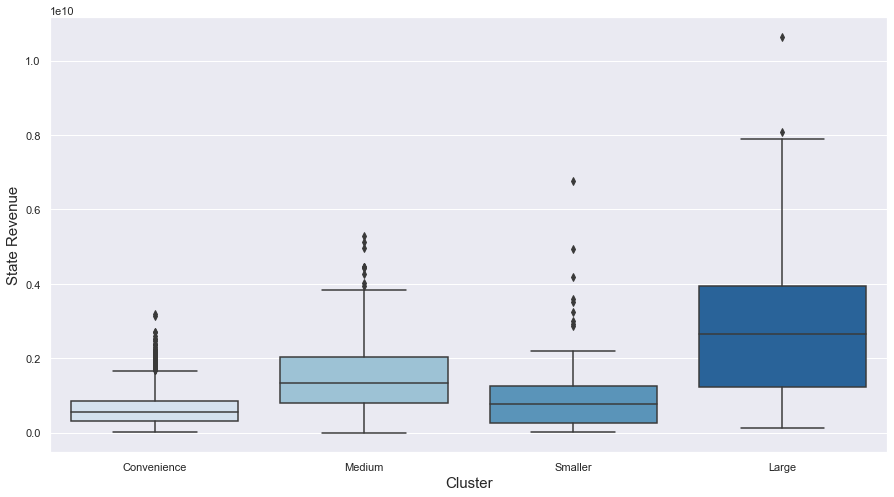

In [89]:
feature = 'store_revenue'


sns.set(rc = {'figure.figsize':(15,8)})
box = sns.boxplot(x='Store_Cluster', y=feature, data=stores_clust_info_combined4,palette='Blues')

box.set_xlabel('Cluster',fontsize=15)
box.set_ylabel('State Revenue',fontsize=15)
                 

# box.set_title(feature,fontsize=20)



In [74]:
# where do I put my store to make the most money
# don't worry about inventory

Text(0, 0.5, 'Number of Unique Products')

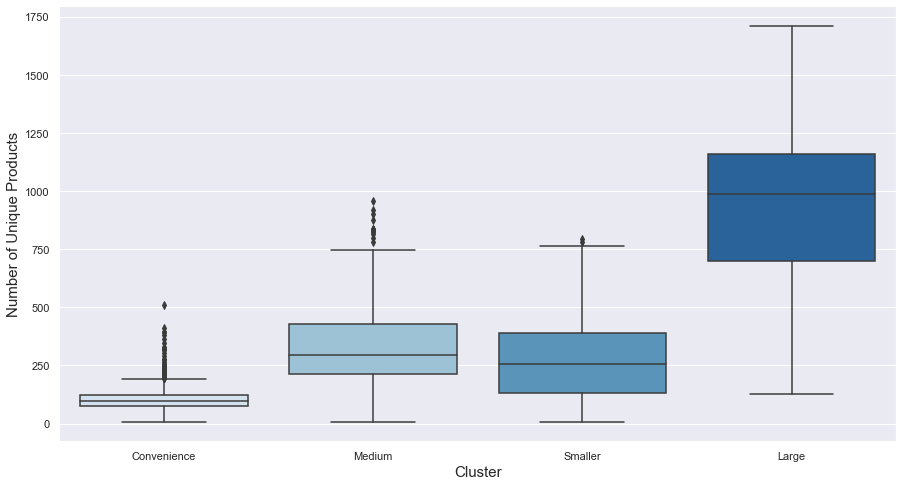

In [90]:
feature = 'tot_num_unique_items'


sns.set(rc = {'figure.figsize':(15,8)})
box = sns.boxplot(x='Store_Cluster', y=feature, data=stores_clust_info_combined4,palette='Blues')

box.set_xlabel('Cluster',fontsize=15)
box.set_ylabel('Number of Unique Products',fontsize=15)
                 

# box.set_title(feature,fontsize=20)


In [93]:
feature = 'tot_num_unique_items'

def box(feature,ylabel):

    sns.set(rc = {'figure.figsize':(15,8)})
    box = sns.boxplot(x='Store_Cluster', y=feature, data=stores_clust_info_combined4,palette='Blues')

    box.set_xlabel('Cluster',fontsize=15)
    box.set_ylabel(ylabel,fontsize=15)
                 


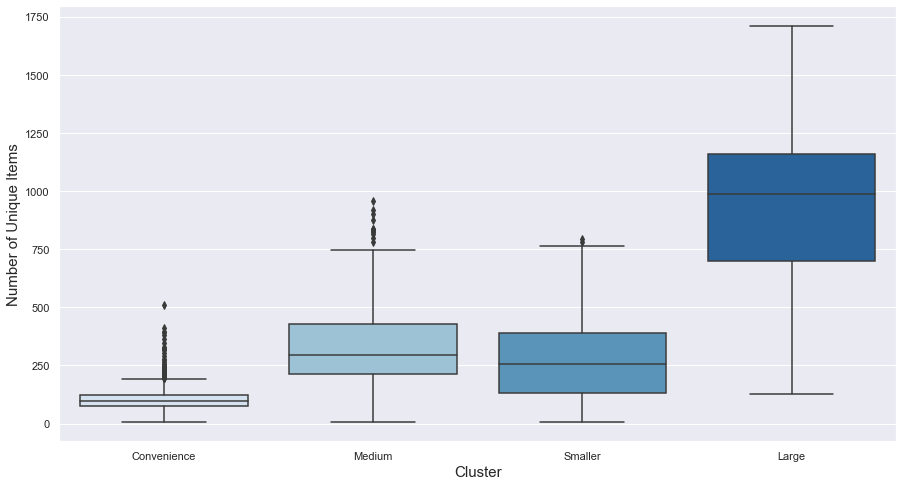

In [104]:
box('tot_num_unique_items','Number of Unique Items')

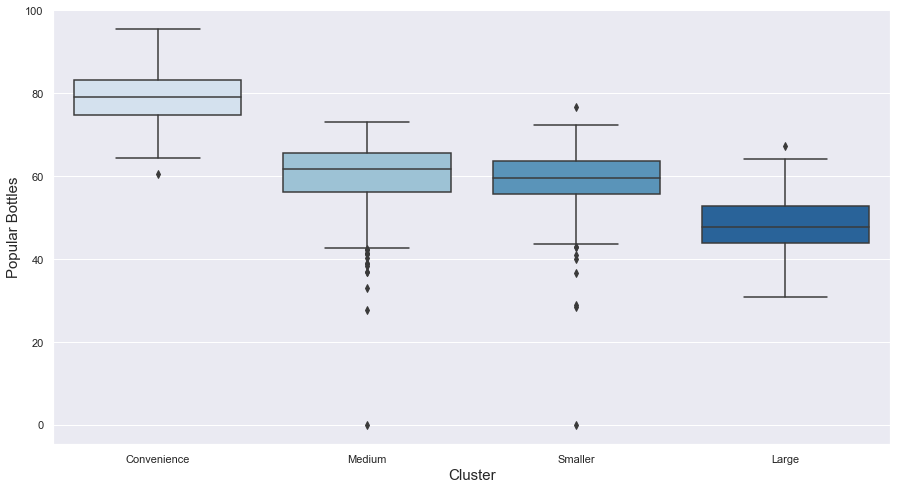

In [95]:
box('rev_Popular_Bottles','Popular Bottles')

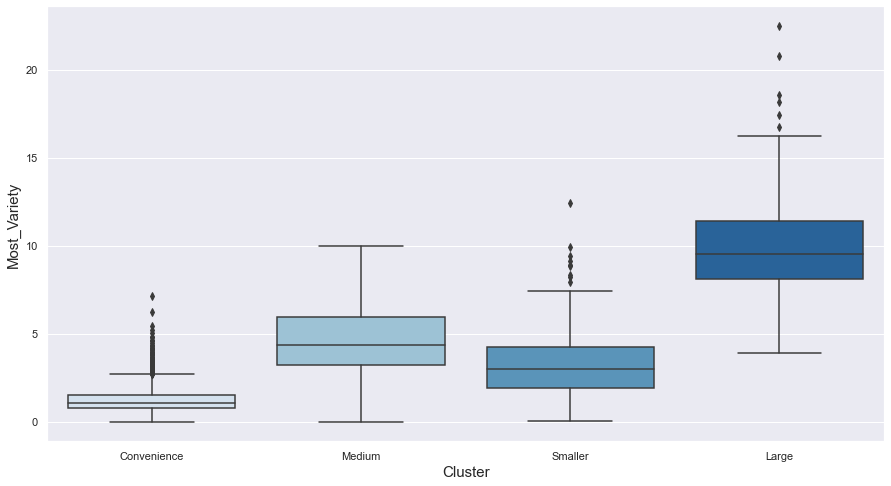

In [96]:
box('rev_Most_Variety','Most_Variety')

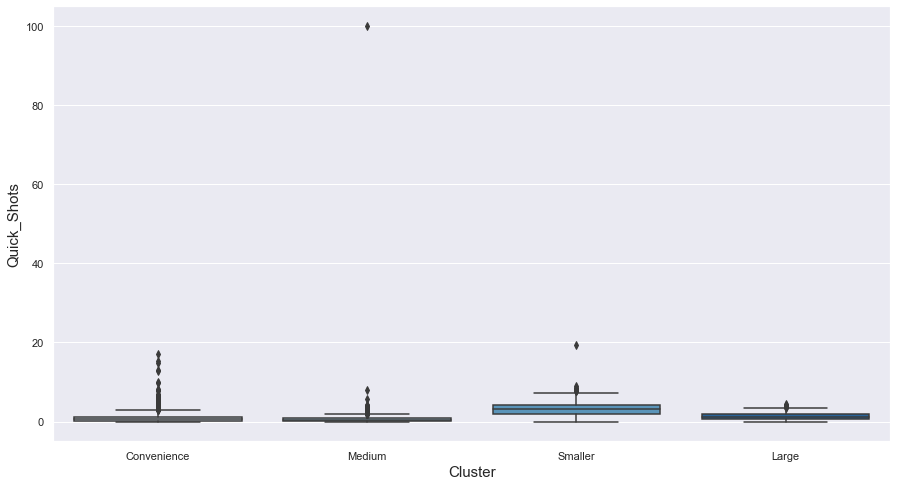

In [97]:
box('rev_Quick_Shots','Quick_Shots')

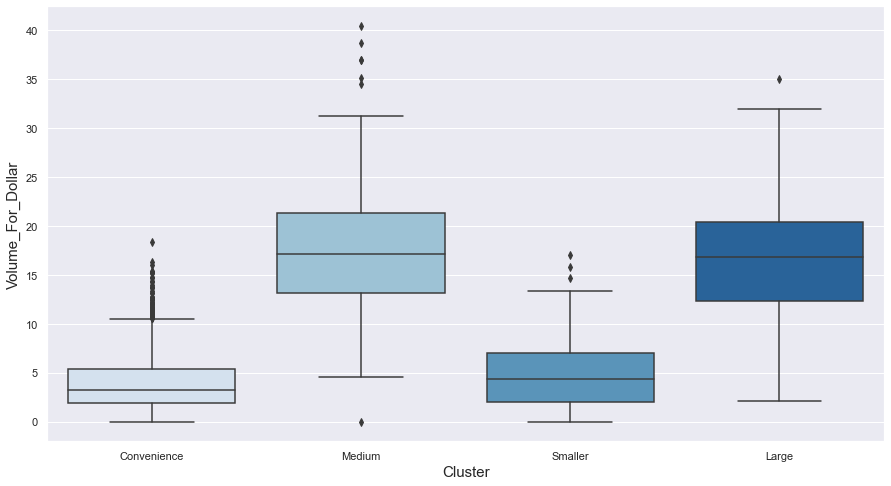

In [98]:
box('rev_Volume_For_Dollar','Volume_For_Dollar')

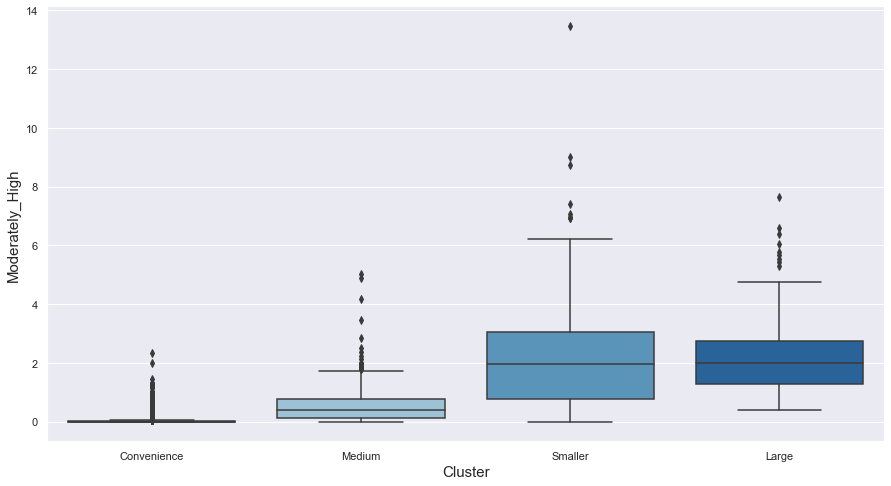

In [99]:
box('rev_Moderately_High','Moderately_High')

In [103]:
# stores_clust_info_combined4.columns

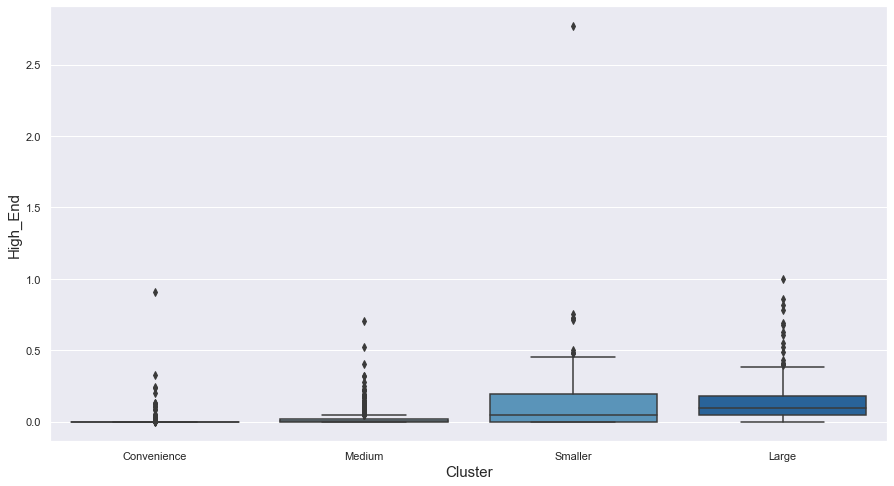

In [102]:
box('rev_High_End','High_End')